In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons


import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [45]:
## Generating Binary Classification Dataset

x,y = make_moons(n_samples=250, noise=0.25, random_state=1)

In [46]:
x

array([[-0.13249283,  0.79819677],
       [ 2.31843898,  0.99177544],
       [ 1.42186457,  0.34604436],
       [ 0.79480671, -0.20627281],
       [-0.97020185,  0.95784991],
       [ 1.76079819, -0.2428572 ],
       [-0.20634621,  1.1325037 ],
       [ 2.12685472, -0.02683228],
       [ 0.95372432, -0.77040037],
       [ 1.19533458,  0.11281015],
       [ 1.93767258,  0.29814377],
       [ 1.24255425, -0.31207617],
       [-0.84716361,  0.23572382],
       [ 0.89311669, -0.33739211],
       [ 0.05940713,  0.61998868],
       [-0.47188505,  0.31024837],
       [ 1.18377304,  0.049632  ],
       [ 0.38543722,  0.93637792],
       [ 0.74090447,  0.60217849],
       [-0.27074376,  0.68091205],
       [ 1.69148983, -0.32052492],
       [ 0.71357227,  0.68459783],
       [-0.61821075,  0.62670905],
       [ 1.22125108, -0.4462956 ],
       [-0.44719439, -0.37292191],
       [-1.15371635,  0.35171032],
       [ 2.62919434,  0.36190819],
       [ 1.97899437,  0.19276891],
       [ 0.90413249,

In [47]:
y

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0])

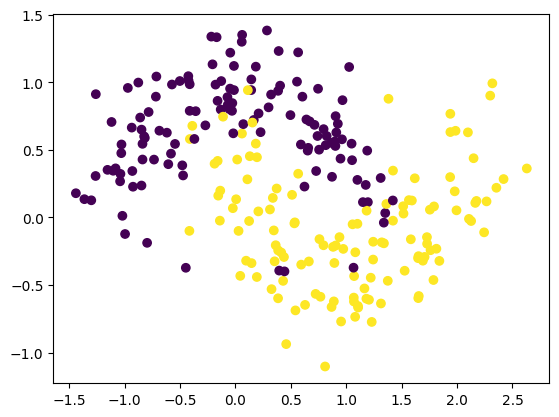

In [48]:
## Data Visualization

plt.scatter(x[:,0], x[:,1],c=y)

# Zero Weight Initialization with 'relu' as activation function

In [49]:
## Buulding ANN

model = Sequential()
model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
## Checking the Initial Weigths

model.get_weights()

[array([[-0.264872 , -1.2037859],
        [ 0.6273049, -1.1980066]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.0962695],
        [-0.5234527]], dtype=float32),
 array([0.], dtype=float32)]

In [51]:
## Setting the weights to Zero

initial_weights = model.get_weights()

In [52]:

initial_weights[0]= np.zeros(model.get_weights()[0].shape)
initial_weights[1]= np.zeros(model.get_weights()[1].shape)
initial_weights[2]= np.zeros(model.get_weights()[2].shape)
initial_weights[3]= np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)

In [53]:
## Checking the result

model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

Weights are set to Zero

In [54]:
## Training the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs= 100, validation_split = 0.2 , verbose =0  )

In [55]:
## Checking the weights posting training

model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.05059079], dtype=float32)]

In [56]:
## So no chnage in weights that means No TRAINING took place

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

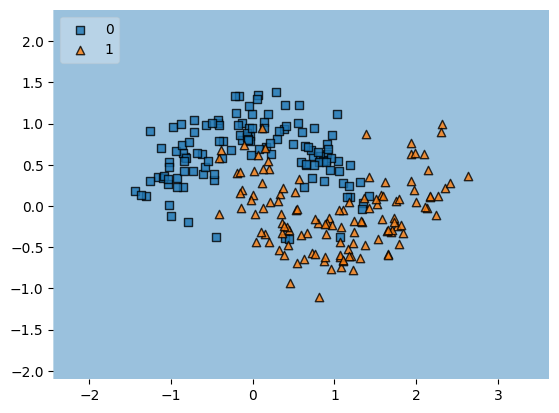

In [57]:
# Checking the decsion boundaries

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model, legend =2)

In [58]:
## No Decision boundary all belongs to class 0 i.e blue region. In short Model performing terrible

# Zero Weigth Initialization with 'tanh' as activation fucntion

In [59]:
## Buulding ANN

model = Sequential()
model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
## Checking the Initial Weigths

model.get_weights()

[array([[-0.4915102 ,  0.85009825],
        [-1.160922  , -0.74083376]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.249068 ],
        [ 1.1703128]], dtype=float32),
 array([0.], dtype=float32)]

In [61]:
## Setting the inital weights to Zero

initial_weights = model.get_weights()
initial_weights[0]= np.zeros(model.get_weights()[0].shape)
initial_weights[1]= np.zeros(model.get_weights()[1].shape)
initial_weights[2]= np.zeros(model.get_weights()[2].shape)
initial_weights[3]= np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)

In [62]:
## Checking the result

model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [63]:
## Training the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs= 100, validation_split = 0.2, verbose=0 )

In [64]:
## Checking the weights after training

model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([-0.0497859], dtype=float32)]

NO Changes in the weights mean Model is not trained

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

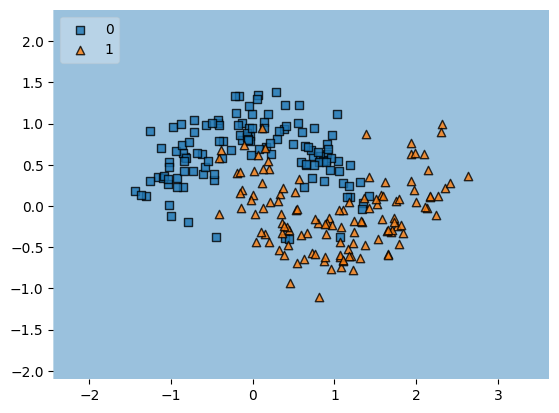

In [65]:
# Checking the decsion boundaries

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model, legend =2)

In [66]:
## No Decision boundary all belongs to class 0 i.e blue region. In short Model performing terrible

# Zero Weigth Initialization with 'Sigmoid' as activation fucntion

In [68]:
## Buulding ANN

model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
## Checking the Initial Weigths

model.get_weights()

[array([[-1.0228417 , -0.07761323],
        [ 0.9898075 , -0.14555395]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.2403017 ],
        [-0.02957761]], dtype=float32),
 array([0.], dtype=float32)]

In [70]:
## Setting the inital weights to Zero

initial_weights = model.get_weights()
initial_weights[0]= np.zeros(model.get_weights()[0].shape)
initial_weights[1]= np.zeros(model.get_weights()[1].shape)
initial_weights[2]= np.zeros(model.get_weights()[2].shape)
initial_weights[3]= np.zeros(model.get_weights()[3].shape)

model.set_weights(initial_weights)

In [71]:
## Checking the result

model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [72]:
## Training the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs= 100, validation_split = 0.2, verbose=0 )

In [73]:
## Checking the weights after training

model.get_weights()

[array([[-1.066529 , -1.066529 ],
        [ 1.1380289,  1.1380289]], dtype=float32),
 array([-0.07750164, -0.07750164], dtype=float32),
 array([[-0.49826485],
        [-0.49826485]], dtype=float32),
 array([0.15962158], dtype=float32)]

In [66]:
## No we observe the values of the wieights in first layer are similar, so they are acting as a single  and that goes with
## each layer

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

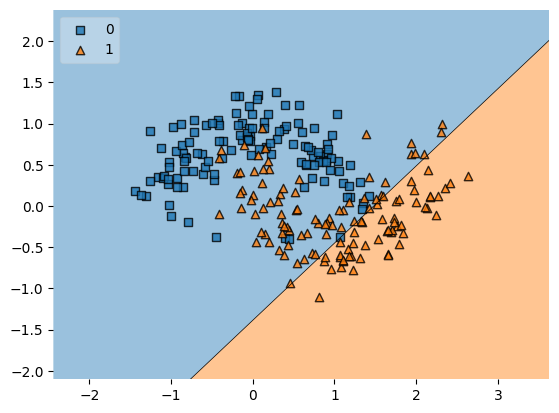

In [74]:
# Checking the decsion boundaries

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model, legend =2)

In [66]:
## So as we can clearly see that model fail to capture the non-linearity of the data snd is activating as a linear model